In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

imdb_df = pd.read_csv("imdb_clean.csv")

imdb_df.columns = ["titulo", "ano de lancamento", "duracao", "genero", "notas", "Money(M)"]
display(imdb_df.head())

ModuleNotFoundError: No module named 'scipy'

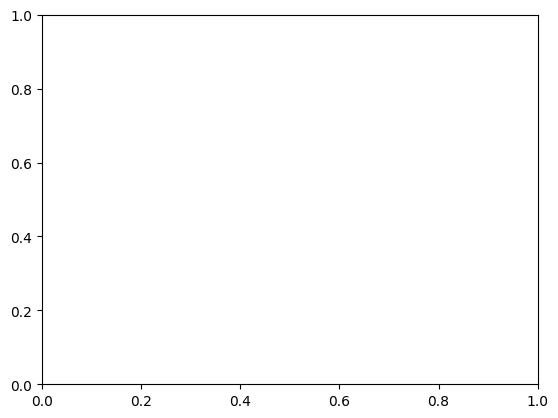

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo usando uma coluna de um DataFrame
df = pd.DataFrame({'nota': [7, 8, 6, 9, 7, 8, 5, 9, 8, 7]})
df['nota'].plot.kde()
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade da Nota')
plt.show()


In [ ]:
eixo_y = [8.06, 8.05, 7.99, 7.93, 7.92]
eixo_x = ['western', 'war', 'crime', 'history', 'thriller']
plt.bar(eixo_x, eixo_y)
plt.axis(ymin = 7.9, ymax = 8.1)
plt.ylabel('Notas de acordo com o IMDB')
plt.xlabel('Generos')
plt.title('Nota dos 5 generos melhores avaliados')
plt.show()

In [ ]:
eixo_y = [146.1, 132.8, 121.6, 119, 100.6]
eixo_x = ['aventura', 'sci-fi', 'fantasia', 'acao', 'animacao']
plt.bar(eixo_x, eixo_y)
plt.ylabel('Dinheiro gasto em Milhoes')
plt.xlabel('Generos')
plt.title('Dinheiro gasto por genero de filme')
plt.show()


In [ ]:
with open('imdb_clean.csv', 'r') as arquivo:
    linhas = arquivo.readlines()

# Deletar a palavra em cada linha
palavra_a_deletar = "min"  # Substitua "palavra" pela palavra que você deseja deletar

linhas_modificadas = []
for linha in linhas:
    linha_modificada = linha.replace(palavra_a_deletar, '')
    linhas_modificadas.append(linha_modificada)

# Escrever as linhas modificadas de volta no arquivo
with open('imdb_clean.csv', 'w') as arquivo:
    arquivo.writelines(linhas_modificadas)

In [ ]:
imdb_df = pd.read_csv("imdb_clean.csv")
display(imdb_df.head())
imdb_df.columns = ["titulo", "ano de lancamento", "duracao", "genero", "notas", "Money(M)"]
display(imdb_df.head())

In [ ]:
dataframe_dados_num = imdb_df.copy()
dataframe_dados_num = dataframe_dados_num.drop('titulo', axis=1)
dataframe_dados_num = dataframe_dados_num.drop('genero', axis=1)
dataframe_dados_num = dataframe_dados_num.drop('ano de lancamento', axis=1)

X = dataframe_dados_num.drop('notas', axis=1)
y = imdb_df["notas"]

from sklearn.model_selection import train_test_split

XTrain, XTeste, yTrain, yTest = train_test_split(X, y, test_size = 0.20)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(XTrain, yTrain)
y_pred = regressor.predict(XTeste)

print(regressor.score(XTeste, yTest))